In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_excel(r"/content/drive/MyDrive/Data_Train.xlsx")
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df = data.copy()
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.dropna(subset=['Route','Total_Stops'],inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
df.reset_index(drop=True,inplace=True)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.3 MB


In [ ]:
def change_to_Datetime(col):
  df[col] = pd.to_datetime(df[col])

In [ ]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_to_Datetime(feature)

<ipython-input-10-25aeaa6f2764>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-10-25aeaa6f2764>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-10-25aeaa6f2764>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-04 05:50:00,2024-09-04 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-09-04 18:05:00,2024-09-04 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-09-04 16:50:00,2024-09-04 21:35:00,4h 45m,1 stop,No info,13302


In [ ]:
df['Day'] = df['Date_of_Journey'].dt.day

In [ ]:
df['Months'] = df['Dep_Time'].dt.month

In [ ]:
df['Year'] = df['Arrival_Time'].dt.year

In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,9,2024
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-04 05:50:00,2024-09-04 13:15:00,7h 25m,2 stops,No info,7662,1,9,2024
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,9,2024


In [ ]:
# Extracting hour and minute
def extract_hour_minute(df,col):
  df[col+'_hour'] = df[col].dt.hour
  df[col+"_minute"] = df[col].dt.minute

In [ ]:
extract_hour_minute(df,'Dep_Time')
extract_hour_minute(df,'Arrival_Time')

In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,9,2024,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-04 05:50:00,2024-09-04 13:15:00,7h 25m,2 stops,No info,7662,1,9,2024,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,9,2024,9,25,4,25


In [ ]:
col_to_drop = ['Dep_Time','Arrival_Time']
df.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,9,2024,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,9,2024,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,2024,9,25,4,25


In [ ]:
df.shape

(10682, 16)

In [ ]:
def part_of_day(x):
    if (x >= 4) and (x < 8):
        return 'Early Morning'
    elif (x >= 8) and (x < 12):  # Use >= to include 8 in the 'Morning' category
        return 'Morning'
    elif (x >= 12) and (x < 16):  # Use >= to include 12 in the 'Afternoon' category
        return 'Afternoon'
    elif (x >= 16) and (x < 20):  # Use >= to include 16 in the 'Evening' category
        return 'Evening'
    elif (x >= 20) and (x < 24):  # Use >= to include 20 in the 'Night' category
        return 'Night'
    else:
        return 'Late Night'

<Axes: xlabel='Dep_Time_hour'>

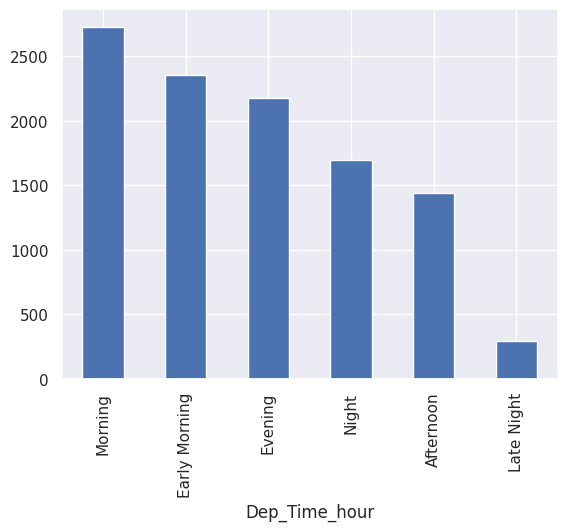

In [ ]:
df['Dep_Time_hour'].apply(part_of_day).value_counts().plot(kind='bar')

In [ ]:
import plotly

In [ ]:
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import iplot, init_notebook_mode, plot

# Initialize plotly to work in offline mode in Jupyter Notebook
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
df['Dep_Time_hour'].apply(part_of_day).value_counts().iplot(kind ='bar')

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,9,2024,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,9,2024,5,50,13,15


In [ ]:
def process_duration(x):
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x=x + ' ' + '0m'

  return x

In [ ]:
df['Duration'] = df['Duration'].apply(process_duration)

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,9,2024,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,9,2024,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,9,2024,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,9,2024,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,9,2024,16,50,21,35


In [ ]:
int(df['Duration'][1].split(' ')[1][0:-1])

25

In [ ]:
df['Duration_hour'] = df['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
df['Duration_minute'] = df['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,9,2024,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,9,2024,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,9,2024,9,25,4,25,19,0


In [ ]:
df['Duration_minute'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40])

In [ ]:
df['Duration_total_mins'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['Duration_total_mins']

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10677,150
10678,155
10679,180
10680,160


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

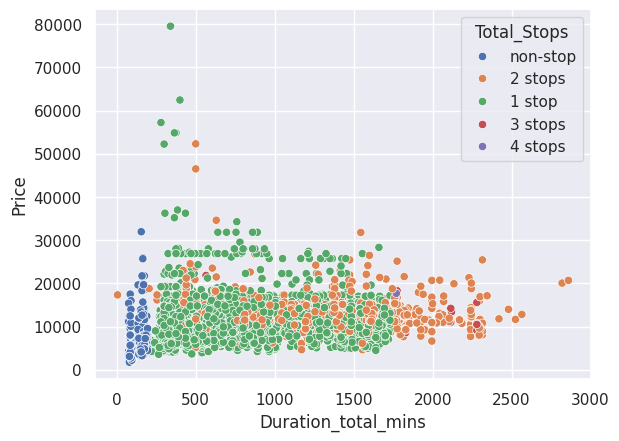

In [ ]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue = 'Total_Stops',data=df)

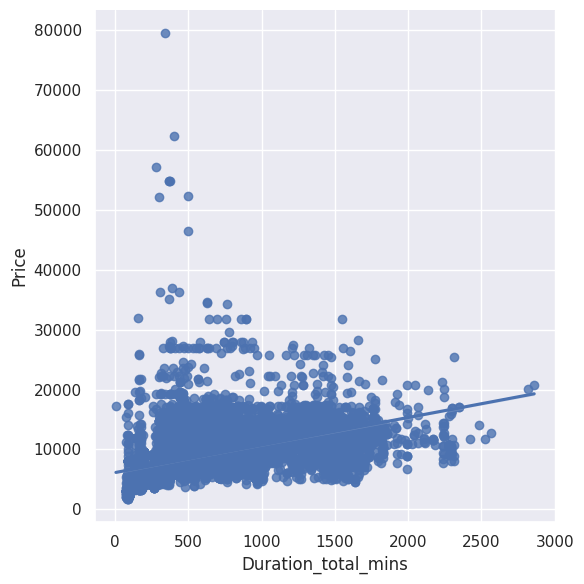

In [ ]:
sns.lmplot(x='Duration_total_mins',y='Price',data=df,height=6)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Months',
       'Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Months',
       'Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df[df['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

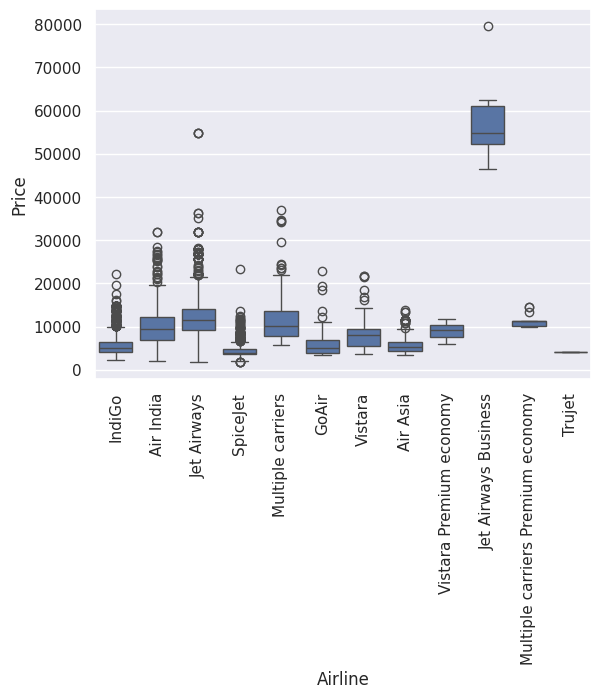

In [ ]:
sns.boxplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Months',
       'Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

In [ ]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
 cat_col = [col for col in df.columns if df[col].dtype == 'object']
 cat_col


['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
num_col

['Date_of_Journey',
 'Price',
 'Day',
 'Months',
 'Year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute',
 'Duration_total_mins']

In [ ]:
for sub_category in df['Source'].unique():
  df['Source_' + sub_category] = df['Source'].apply(lambda x:1 if x == sub_category else 0)

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
airline = df.groupby(['Airline'])['Price'].mean().sort_values().index
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airline = {key:index for index,key in enumerate(airline,start=0)}
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
df['Airline'] = df['Airline'].map(dict_airline)
df['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10677,2
10678,7
10679,10
10680,5


In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [ ]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
df['Destination'].replace('New Delhi','Delhi',inplace=True)

In [ ]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
destination = df.groupby(['Destination'])['Price'].mean().sort_values().index
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_destination = {key:index for index,key in enumerate(destination,start=0)}
dict_destination

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
df['Destination'] = df['Destination'].map(dict_destination)
df['Destination']

,Destination
0,2
1,3
2,4
3,3
4,2
...,...
10677,3
10678,3
10679,2
10680,2


In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [ ]:
pd.options.display.max_columns=None
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0


In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(stop)

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,9,2024,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,9,2024,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,9,2024,16,50,21,35,4,45,285,1,0,0,0,0


In [ ]:
df_processed = df.copy()
df_processed.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,9,2024,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,9,2024,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,9,2024,16,50,21,35,4,45,285,1,0,0,0,0


In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Months',
       'Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
dropped_columns = ['Route','Duration','Additional_Info','Source']
dropped_columns

['Route', 'Duration', 'Additional_Info', 'Source']

In [ ]:
df_processed.drop(dropped_columns,axis=1,inplace=True)

In [ ]:
df_processed.head(5)

,Airline,Date_of_Journey,Destination,Total_Stops,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,2,0,3897,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,3,2,7662,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,4,2,13882,9,9,2024,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,3,1,6218,12,9,2024,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,2,1,13302,1,9,2024,16,50,21,35,4,45,285,1,0,0,0,0


In [ ]:
def plot(df,col):
  fig,(ax1,ax2,ax3) = plt.subplots(3,1)
  sns.histplot(df[col],ax=ax1,kde=True)
  sns.boxplot(df[col],ax=ax2)
  plt.xticks(rotation=90)
  sns.histplot(df[col],ax=ax3)
  plt.tight_layout()

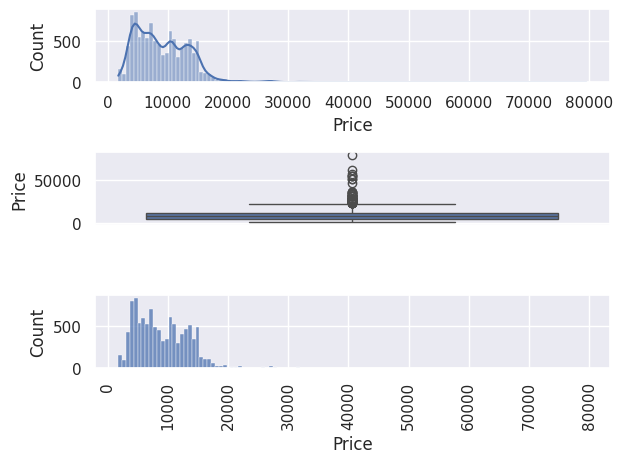

In [ ]:
plot(df_processed,'Price')

In [ ]:
q3 = df_processed['Price'].quantile(0.75)
q1 = df_processed['Price'].quantile(0.25)

iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [ ]:
df_processed['Price'].max()

79512

In [ ]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [ ]:
print([price for price in df_processed['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
len([price for price in df_processed['Price'] if price > maximum or price < minimum])

94

In [ ]:
df_processed['Price'] = np.where(df_processed['Price']>30000 , df_processed['Price'].median(), df_processed['Price'])

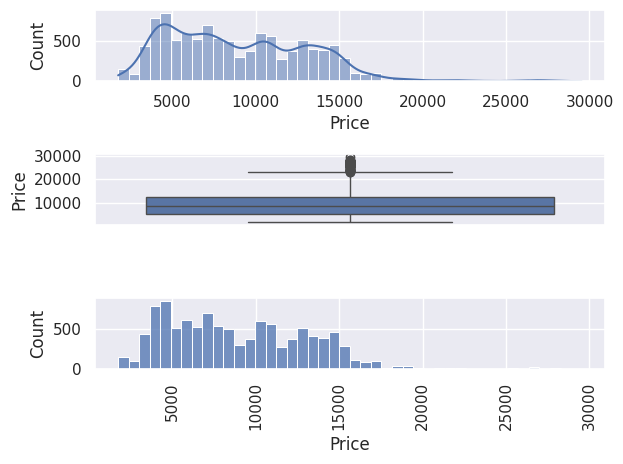

In [ ]:
plot(df_processed,'Price')

In [ ]:
df_processed['Price'].max()

29528.0

In [ ]:
df_processed.columns

Index(['Airline', 'Date_of_Journey', 'Destination', 'Total_Stops', 'Price',
       'Day', 'Months', 'Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
df_processed.head(5)

,Airline,Date_of_Journey,Destination,Total_Stops,Price,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,2,0,3897.0,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,3,2,7662.0,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,4,2,13882.0,9,9,2024,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,3,1,6218.0,12,9,2024,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,2,1,13302.0,1,9,2024,16,50,21,35,4,45,285,1,0,0,0,0


In [ ]:
df_processed.columns = ['Airline', 'Date_of_Journey', 'Destination', 'Total_Stops', 'Price',
       'Day', 'Months', 'Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai']

In [ ]:
re_order = ['Airline', 'Date_of_Journey', 'Destination', 'Total_Stops',
       'Day', 'Months', 'Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai','Price']

In [ ]:
df_processed = df_processed[re_order]
df_processed.head(5)

,Airline,Date_of_Journey,Destination,Total_Stops,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Price
0,3,2019-03-24,2,0,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0,3897.0
1,7,2019-05-01,3,2,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0,7662.0
2,10,2019-06-09,4,2,9,9,2024,9,25,4,25,19,0,1140,0,0,1,0,0,13882.0
3,3,2019-05-12,3,1,12,9,2024,18,5,23,30,5,25,325,0,1,0,0,0,6218.0
4,3,2019-03-01,2,1,1,9,2024,16,50,21,35,4,45,285,1,0,0,0,0,13302.0


In [ ]:
df_processed = df_processed.drop(['Date_of_Journey'],axis=1)
df_processed.head(5)

,Airline,Destination,Total_Stops,Day,Months,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Price
0,3,2,0,24,9,2024,22,20,1,10,2,50,170,1,0,0,0,0,3897.0
1,7,3,2,1,9,2024,5,50,13,15,7,25,445,0,1,0,0,0,7662.0
2,10,4,2,9,9,2024,9,25,4,25,19,0,1140,0,0,1,0,0,13882.0
3,3,3,1,12,9,2024,18,5,23,30,5,25,325,0,1,0,0,0,6218.0
4,3,2,1,1,9,2024,16,50,21,35,4,45,285,1,0,0,0,0,13302.0


In [ ]:
df_processed = df_processed.drop(['Months','Year'],axis=1)
df_processed.head(3)

,Airline,Destination,Total_Stops,Day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Price
0,3,2,0,24,22,20,1,10,2,50,170,1,0,0,0,0,3897.0
1,7,3,2,1,5,50,13,15,7,25,445,0,1,0,0,0,7662.0
2,10,4,2,9,9,25,4,25,19,0,1140,0,0,1,0,0,13882.0


In [ ]:
df_processed = df_processed.drop(['Duration_total_mins'],axis=1)
df_processed.head(3)

,Airline,Destination,Total_Stops,Day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Price
0,3,2,0,24,22,20,1,10,2,50,1,0,0,0,0,3897.0
1,7,3,2,1,5,50,13,15,7,25,0,1,0,0,0,7662.0
2,10,4,2,9,9,25,4,25,19,0,0,0,1,0,0,13882.0


In [ ]:
x = df_processed.iloc[:,:-1]
x.head(3)

,Airline,Destination,Total_Stops,Day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,9,9,25,4,25,19,0,0,0,1,0,0


In [ ]:
y = df_processed['Price']
y.head(5)

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0


In [ ]:
x.head(3)

,Airline,Destination,Total_Stops,Day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,9,9,25,4,25,19,0,0,0,1,0,0


In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
imp = mutual_info_regression(x,y)
imp

array([1.31590489, 1.07105448, 0.78218678, 0.37658751, 0.92013885,
       0.74401912, 1.14305055, 0.90230634, 1.11847324, 0.67122737,
       0.38828952, 0.44831669, 0.51983533, 0.13032672, 0.20203776])

In [ ]:
df_imp = pd.DataFrame(imp,x.columns)
df_imp.columns = ['Importance']
df_imp.sort_values(by = 'Importance',ascending = False)

,Importance
Airline,1.315905
Arrival_Time_hour,1.143051
Duration_hour,1.118473
Destination,1.071054
Dep_Time_hour,0.920139
Arrival_Time_minute,0.902306
Total_Stops,0.782187
Dep_Time_minute,0.744019
Duration_minute,0.671227
Source_Delhi,0.519835


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
predict = rf.predict(x_test)

In [ ]:
ml_model = metrics.r2_score(y_test,predict)
ml_model

0.724371594558952

In [ ]:
import pickle

In [ ]:
file = open(r'/content/drive/MyDrive/rf_model.pkl','wb')

In [ ]:
pickle.dump(rf,file)
file.close()

In [ ]:
model = open(r'/content/drive/MyDrive/rf_model.pkl','rb')

In [ ]:
forest = pickle.load(model)

In [ ]:
y_predict = forest.predict(x_test)

In [ ]:
metrics.r2_score(y_test,y_predict)

0.724371594558952

In [ ]:
def mape(y_true,y_pred):
  y_true,y_pred = np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
mape(y_test,predict)

17.418261103093204

In [ ]:
# Automate the ML
def predict(rf):
  model = rf.fit(x_train,y_train)
  print('Training score : {}'.format(model.score(x_train,y_train)))
  prediction = model.predict(x_test)
  print('Prediction is : {}'.format(prediction))
  print('\n')
  r2score = metrics.r2_score(y_test,prediction)
  print('r2_Score : {}'.format(r2score))
  print('MAE : {}'.format(metrics.mean_absolute_error(y_test,prediction)))
  print('MSE : {}'.format(metrics.mean_squared_error(y_test,prediction)))
  print('MAPE : {}'.format(mape(y_test,prediction)))
  print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,prediction))))
  sns.distplot(y_test-prediction)

Training score : 0.9127037238568914
Prediction is : [16588.93333333  5909.49133333  8675.834      ...  3675.77716667
  6968.99166667  7785.82833333]


r2_Score : 0.7234730733891154
MAE : 1487.5019534224778
MSE : 5155627.79766889
MAPE : 17.423369301692073
RMSE : 2270.6007569955777


<ipython-input-112-218654ec213a>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




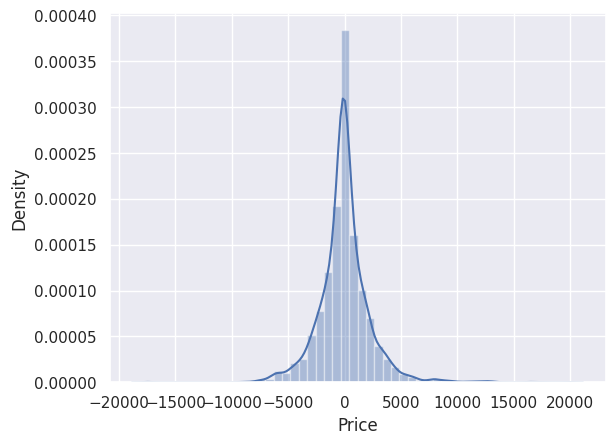

In [ ]:
predict(RandomForestRegressor())

Training score : 0.9303651528848357
Prediction is : [16840.   5135.   8977.5 ...  3419.   6795.   6818. ]


r2_Score : 0.5955702317621903
MAE : 1675.0613788308283
MSE : 7540276.02623189
MAPE : 19.45104839703979
RMSE : 2745.956304501565


<ipython-input-112-218654ec213a>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




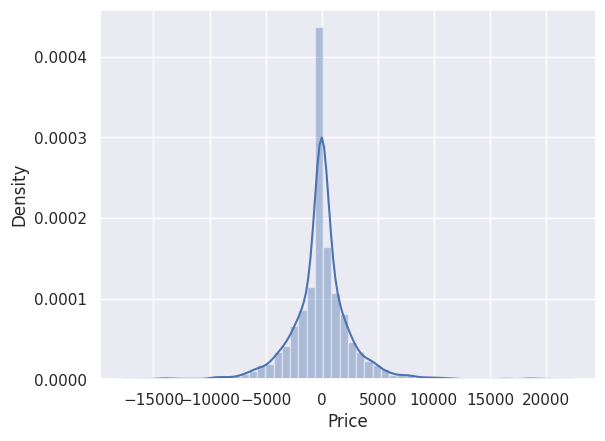

10
